# Exploratory Data Analysis

In [27]:
# using %matplotlib inline to immediatly draw plot after run
%matplotlib inline 

# imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import dotenv
import os

"""prepare environment variable"""
project_dir = os.path.join(os.path.abspath(''), os.pardir)
dotenv_path = os.path.join(project_dir, '.env')
dotenv.load_dotenv(dotenv_path)

True

# Functions

In [14]:
def check_path_existance(path):
    return os.path.exists(path)

# Get Data

In [15]:
dataset_path = os.path.join(project_dir, os.getenv('PROCESSED_FOLDER'), 'train_cleaned.csv')
if check_path_existance(dataset_path):
    train_df = pd.read_csv(dataset_path)
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,...,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Missing,Reg,Lvl,AllPub,...,0,Missing,Missing,Missing,0,4,2010,WD,Normal,142125


# Univariate Analysis

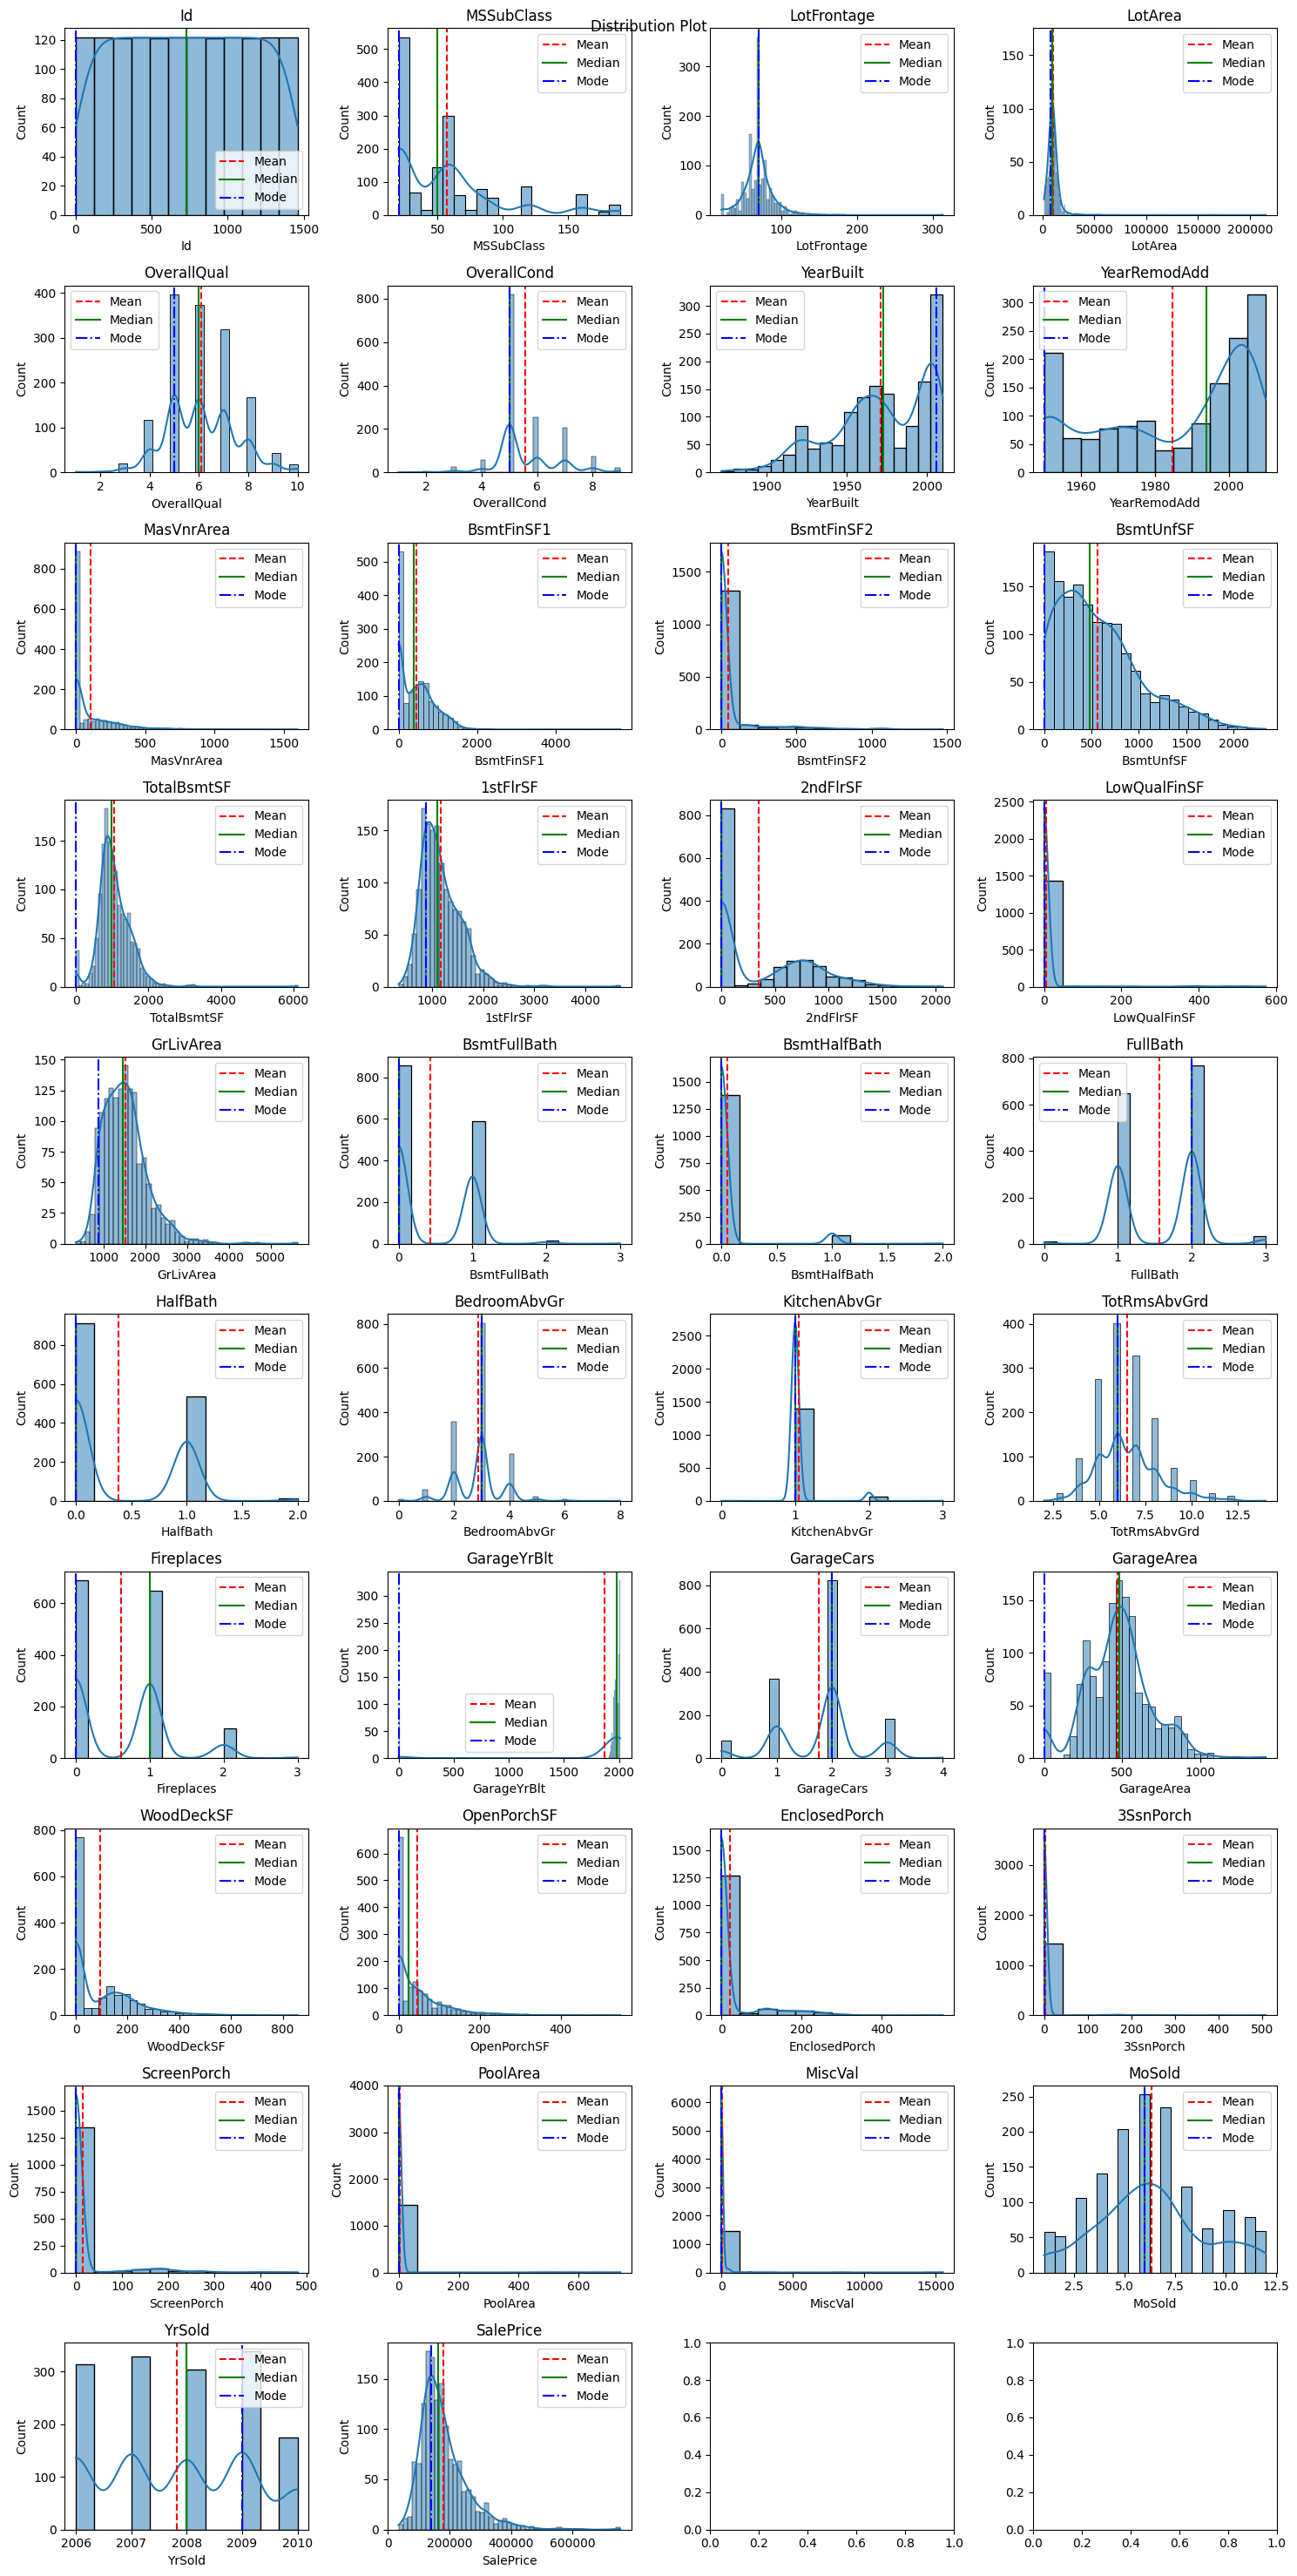

In [30]:
"""Plot Distribution of Numerical Columns"""
def plot_distribution(df: pd.DataFrame, column: str, ax) -> None:
    # calculate mean, median, mode
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().values[0]
    # histogram plot
    sns.histplot(data=df, x=column, ax=ax, kde=True)
    ax.axvline(mean, color='r', linestyle='--', label='Mean')
    ax.axvline(median, color='g', linestyle='-', label='Median')
    ax.axvline(mode, color='b', linestyle='-.', label='Mode')
    ax.legend()
    ax.set_title(column)

numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
ncols = 4
nrows = int(round(len(numerical_columns)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))
fig.suptitle("Distribution Plot")
idx = 0

for r in range(nrows):
    for c in range(ncols):
        if idx < len(numerical_columns):
            column = numerical_columns[idx]
            plot_distribution(df=train_df, column=column, ax=ax[r][c])
            idx+=1
fig.tight_layout()

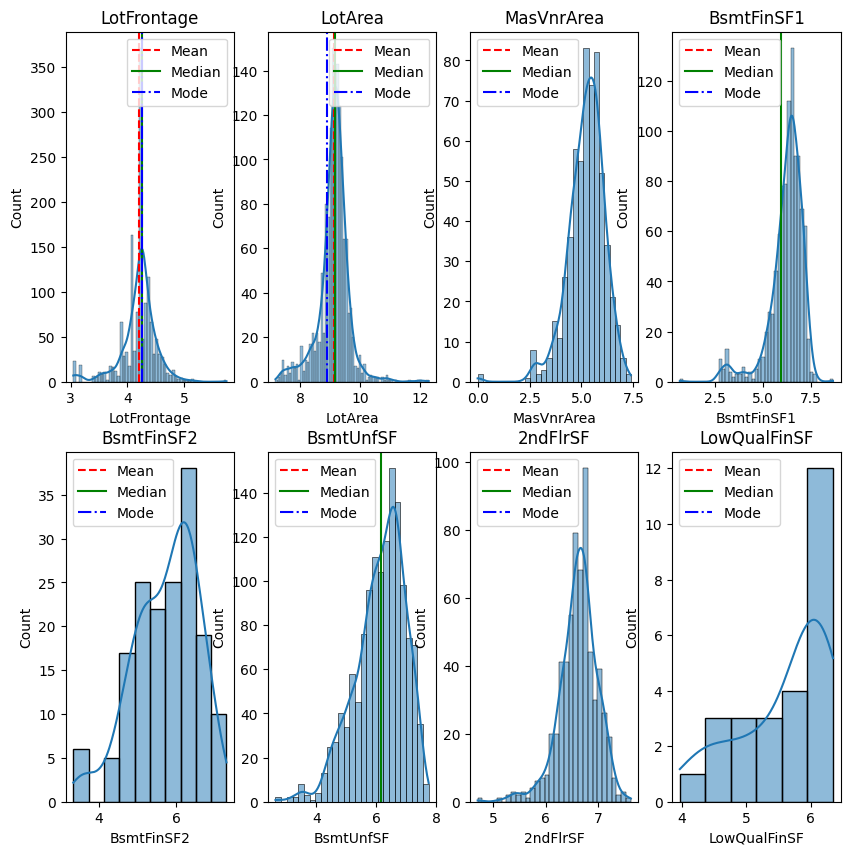

In [36]:
"""Applying Log Transformation Some Numerical Columns"""

transformed_numerical_columns = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
    '2ndFlrSF', 'LowQualFinSF', 'SalePrice'
]
ncols = 4
nrows = int(round(len(transformed_numerical_columns)/ncols))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))
idx = 0

for r in range(nrows):
    for c in range(ncols):
        if idx < len(transformed_numerical_columns):
            data = train_df.copy()
            column = transformed_numerical_columns[idx]
            data[column] = data[column].apply(lambda x: np.log(x))
            plot_distribution(df=data, column=column, ax=ax[r][c])
            idx+=1

In [37]:
"""Check Amount of Percentage of Zeros from Numerical Columns"""
for c in numerical_columns:
    zeros_percentage = train_df.loc[train_df[c]==0, c].count()/len(train_df)*100
    if zeros_percentage > 50:
        print(f"{c} : {zeros_percentage:.2f}%")

MasVnrArea : 59.52%
BsmtFinSF2 : 88.56%
2ndFlrSF : 56.78%
LowQualFinSF : 98.22%
BsmtFullBath : 58.63%
BsmtHalfBath : 94.38%
HalfBath : 62.53%
WoodDeckSF : 52.12%
EnclosedPorch : 85.75%
3SsnPorch : 98.36%
ScreenPorch : 92.05%
PoolArea : 99.52%
MiscVal : 96.44%


Actions to Take Based On This Analysis:
1. Seeing that `Id` column has a uniform distribution which means every record that has the column has a unique value and doesn't add any prediction value.
2. Some of the values belong in the categorical variable such as `MSSubClass`, `OverallQual`, `OverallCond`, and `MoSold`.
3. There are some skewed values that needs to be transformed such as `LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `2ndFlrSF`, `LowQualFinSF`, and `SalePrice`
4. We might be considering to create a new feature that will contain values either 0 or 1 due to so much feature that contain a lot of zeros such as `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`, `2ndFlrSF`, and `LowQualFinSF` 

# Bivariate Analaysis

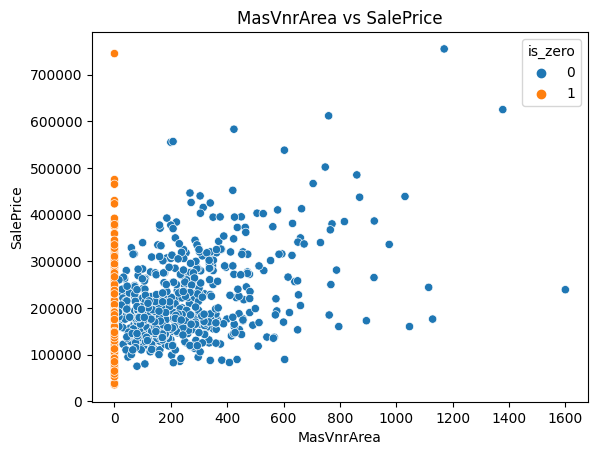

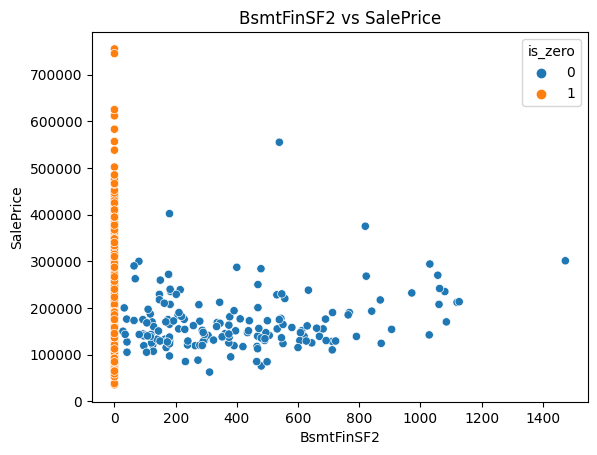

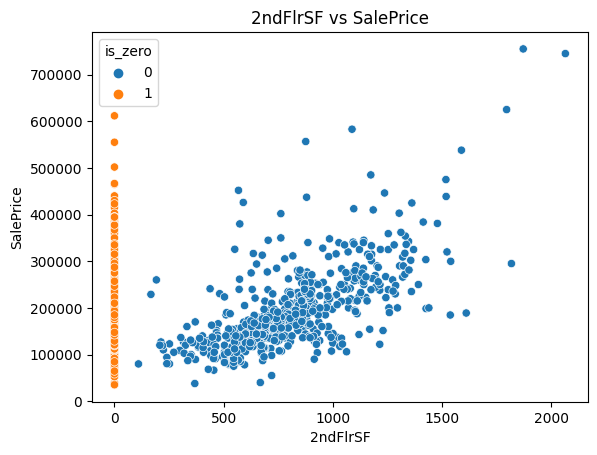

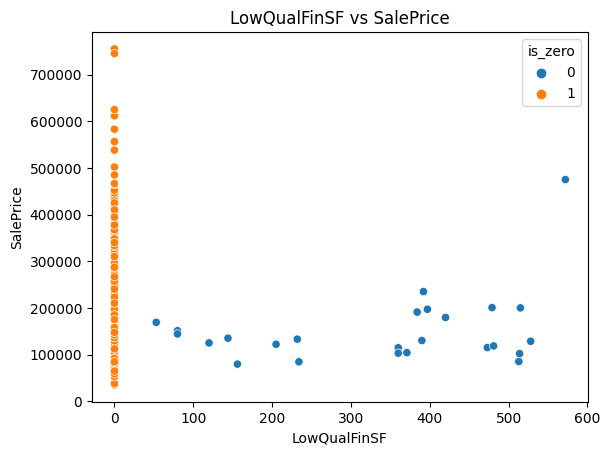

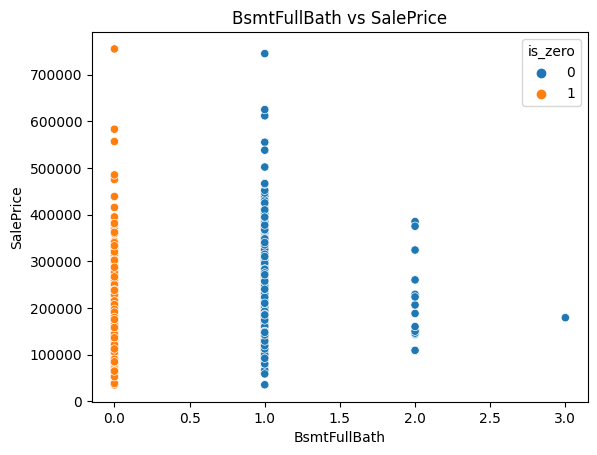

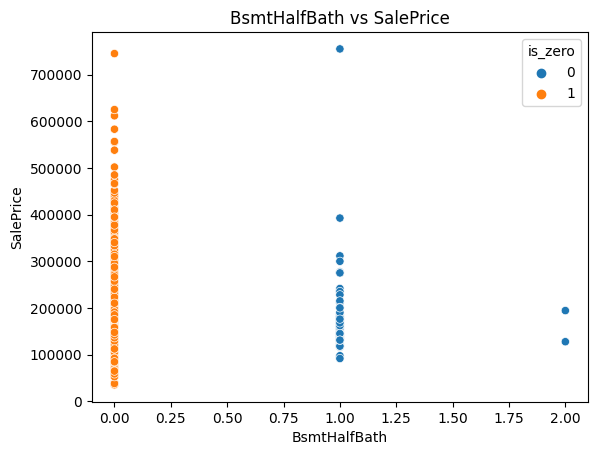

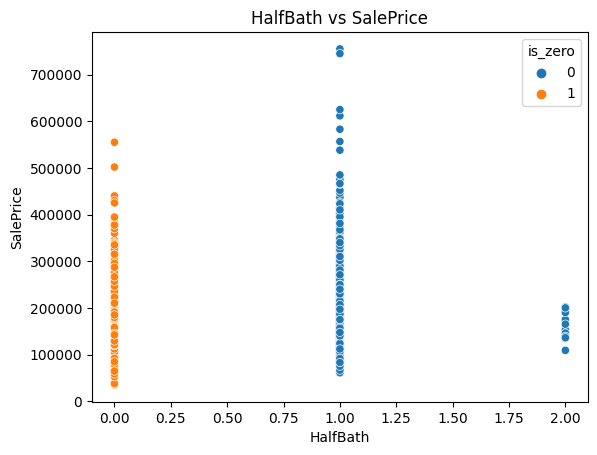

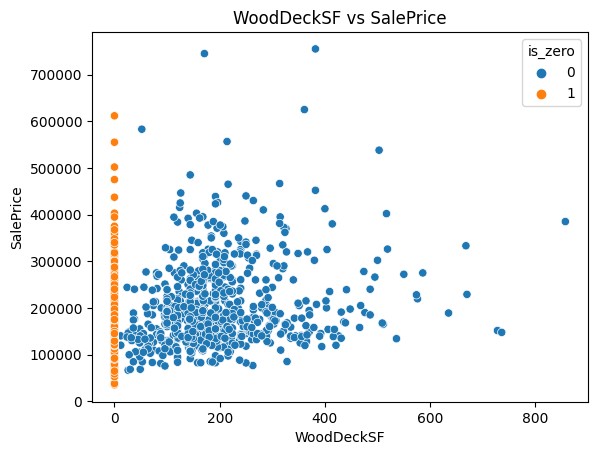

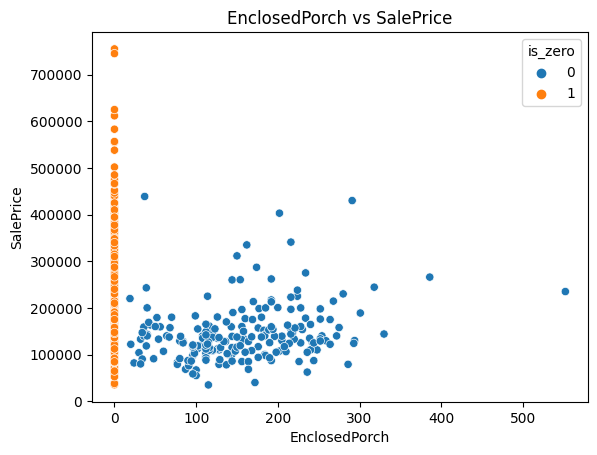

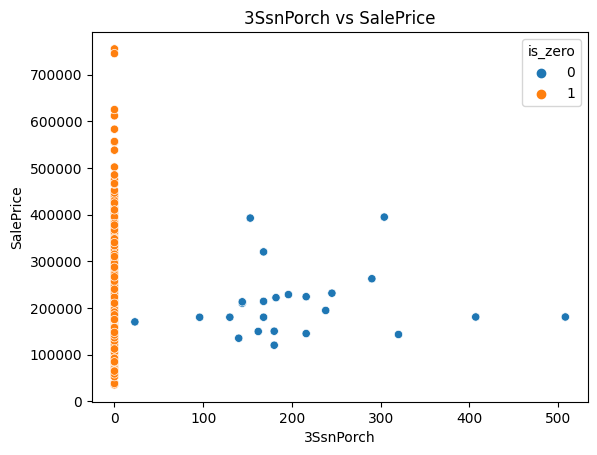

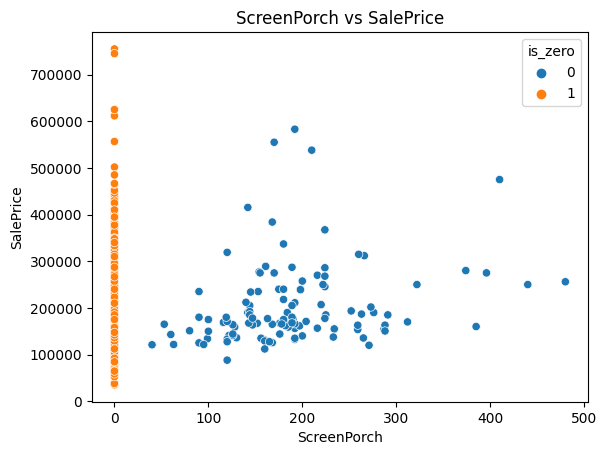

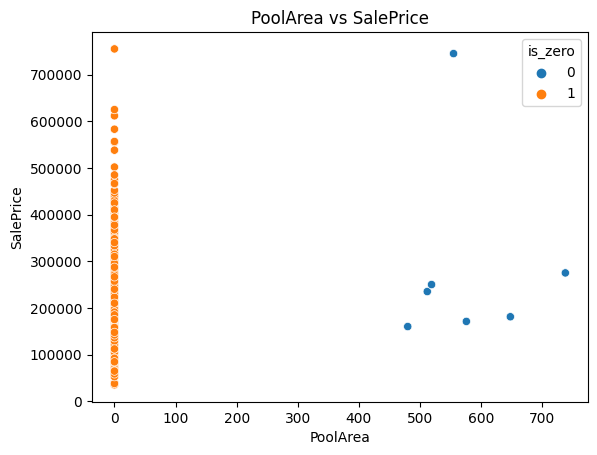

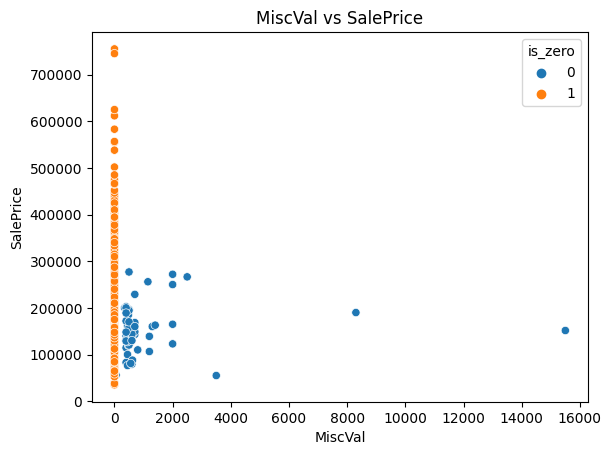

In [52]:
"""Check If So Many Zero Values Help in Detecting Houses with Low Sale Price"""
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
numerical_column_many_zeros = []
for c in numerical_columns:
    zeros_percentage = train_df.loc[train_df[c]==0, c].count()/len(train_df)*100
    if zeros_percentage > 50:
        numerical_column_many_zeros.append(c)

for c in numerical_column_many_zeros:
    plot_df = train_df.loc[:, [c, 'SalePrice']]
    plot_df.loc[:, 'is_zero'] = plot_df.loc[:, c].apply(lambda x: 1 if x == 0 else 0)
    sns.scatterplot(data=plot_df, x=c, y='SalePrice', hue='is_zero')
    plt.title(f"{c} vs SalePrice")
    plt.show()

Having 0 values doesn't mean it has low SalePrice

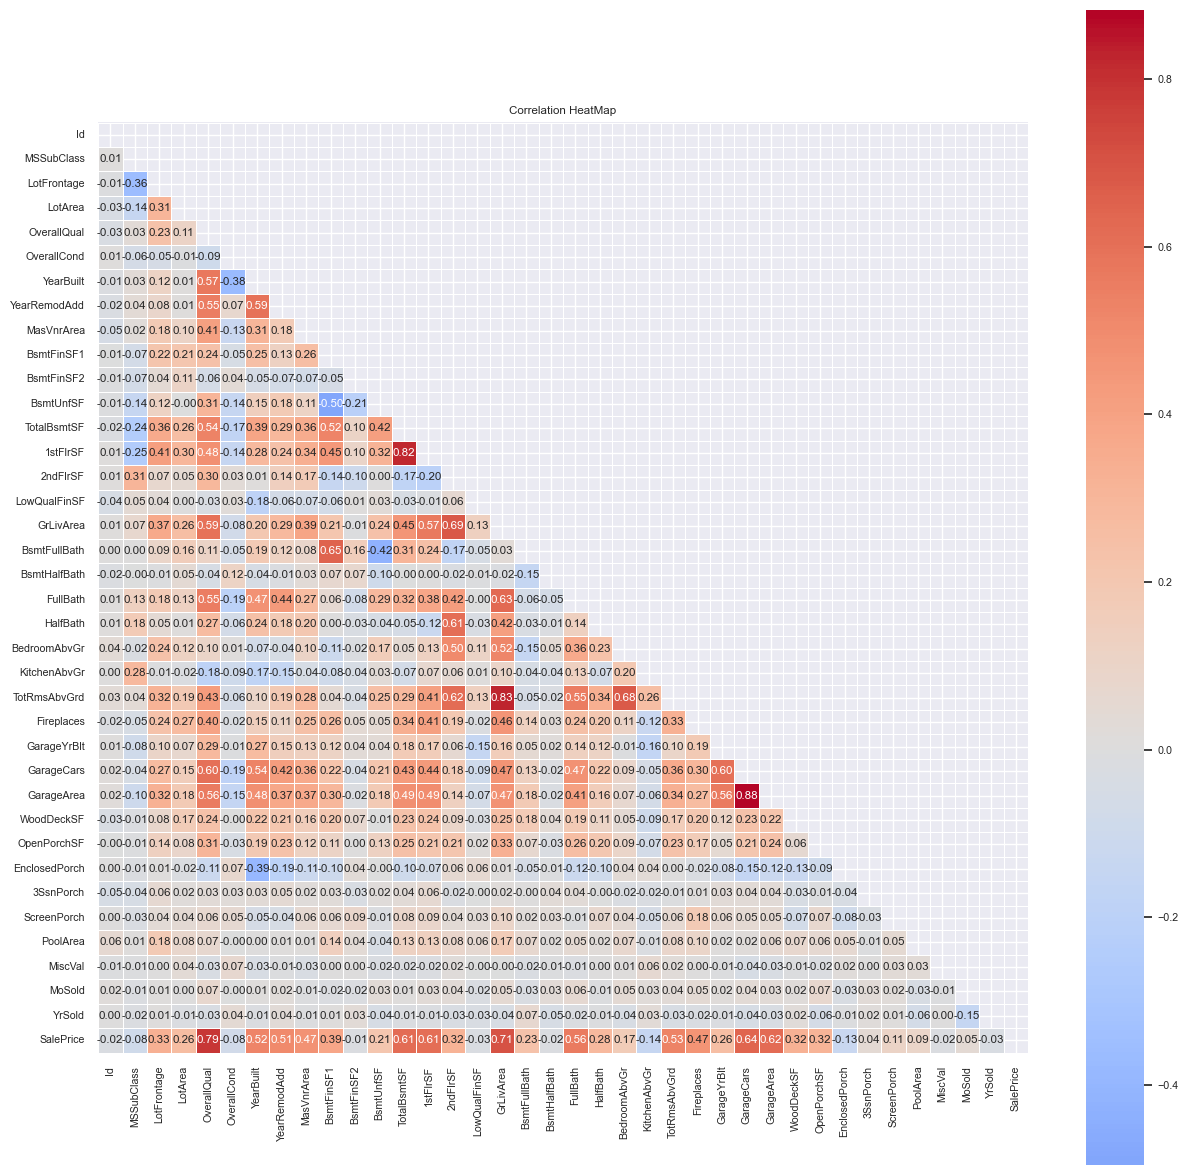

Features with Correlation Value above 0.3 LotFrontage, OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, SalePrice


In [68]:
"""Plot Correlation Map"""
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train_df.loc[:, numerical_columns].corr()
mask = np.triu(np.ones_like(corr_matrix))

plt.figure(figsize=(15, 15), facecolor='w', edgecolor='red')
plt.title("Correlation HeatMap")
sns.set(font_scale=0.7)
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center = 0, 
    annot=True,
    fmt='.2f',
    mask=mask,
    square=True,
    linewidths=0.5,
    
)
plt.show()

print('Features with Correlation Value above 0.3', ', '.join(corr_matrix.loc[corr_matrix['SalePrice'] > 0.3].index.values))

We will be taking numerical columns that have a correlation value above 0.3 with `SalePrice`

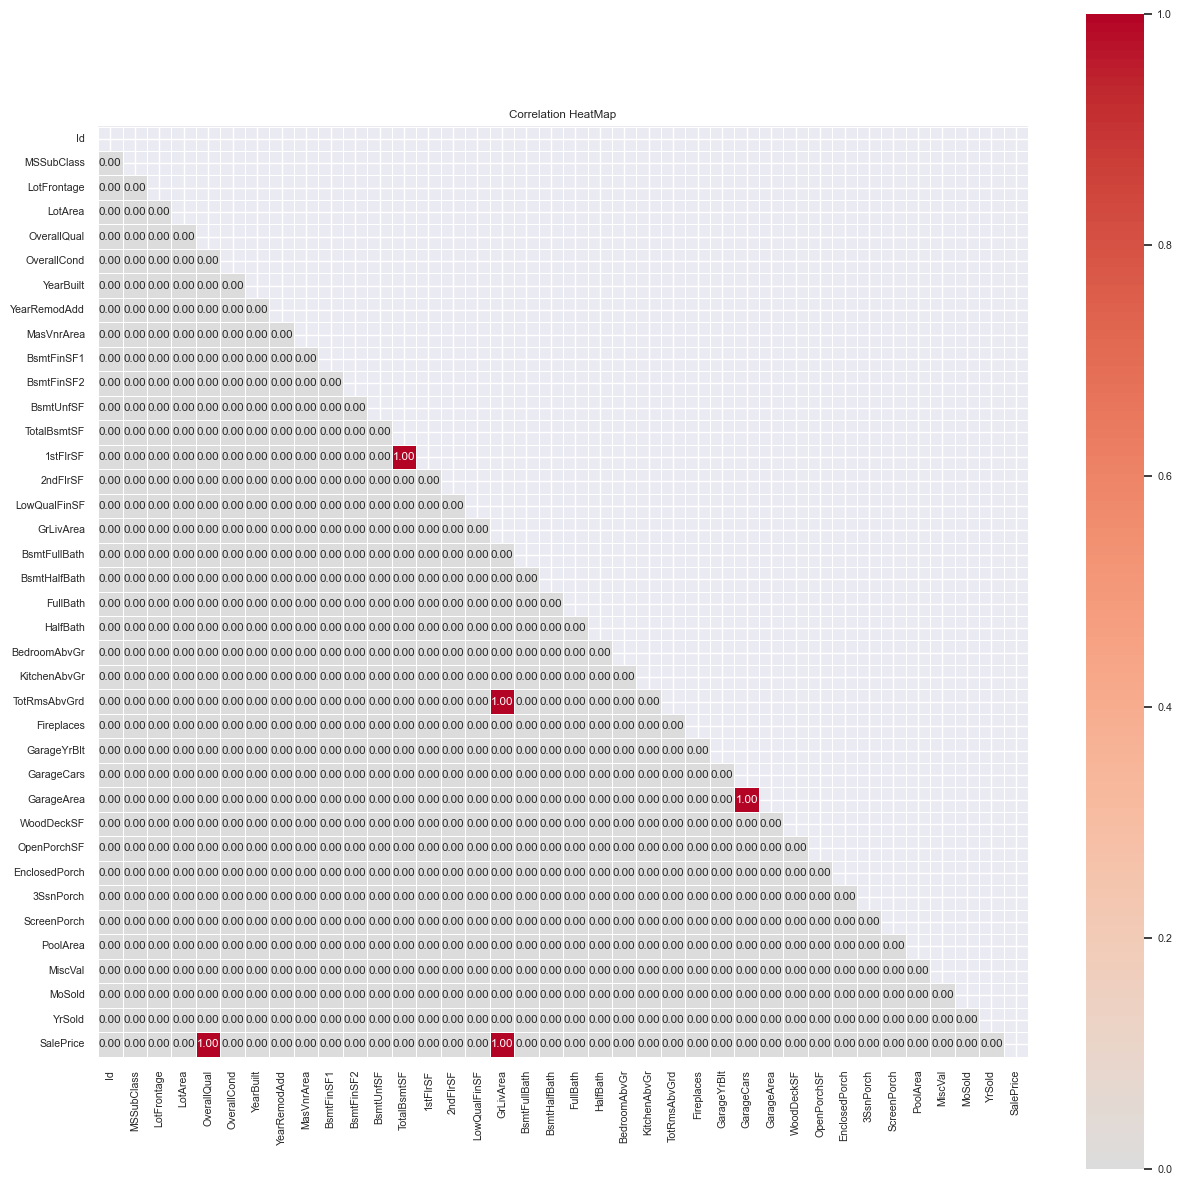

In [57]:
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = train_df.loc[:, numerical_columns].corr() > 0.7
mask = np.triu(np.ones_like(corr_matrix))

plt.figure(figsize=(15, 15), facecolor='w', edgecolor='red')
plt.title("Correlation HeatMap")
sns.set(font_scale=0.7)
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center = 0, 
    annot=True,
    fmt='.2f',
    mask=mask,
    square=True,
    linewidths=0.5,
)
plt.show()

Action To Take: 
1. For handling multicollinearity between `GarageArea` and `GarageCars` is to drop the `GarageCars`
2. For handling multicollinearity between `TotRmsAbvGrd` and `GrLivArea` is to drop the `TotRmsAbvGrd`
3. For handling multicollinearity between `1srFlrSF` and `TotalBsmtSF` is to drop the `1srFlrSF`

# Action Taken From This Exploratory Data Analysis

1. Drop `Id` column
2. Convert `MSSubClass` and `MoSold` to Categorical Column and leave `OverallQual`, and `OverallCond` because they already represent Ordinal Encoding.
3. Perform Log Transformation to `LotFrontage`, `LotArea`, `MasVnrArea`, `Bsmt  FinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `2ndFlrSF`, `LowQualFinSF`, and `SalePrice`
4. Select the numerical columns `LotFrontage`, `OverallQual`, `YearBuilt`, `YearRemodAdd`, `MasVnrArea`, `BsmtFinSF1`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `GrLivArea`, `FullBath`, `TotRmsAbvGrd`, `Fireplaces`, `GarageCars`, `GarageArea`, `WoodDeckSF`, and `OpenPorchSF`